# Day 10 In-Class: Cleaning and Analyzing Economic Data


### <p style="text-align: right;"> &#9989; Put your name here </p>

#### <p style="text-align: right;"> &#9989; Put your group member names here.</p>

<img src="https://www.visualcapitalist.com/wp-content/uploads/2021/12/Global-GDP-by-Country-2021-V15-Mobile-1.jpg" width=400px align="right">

## Goals for today's in-class project

- Load in data and clean Pandas dataframes
- Learn different ways to index Pandas dataframes 
- Analyze different countries GDP data
- Practice using online research to learn new programming skills

## Assignment instructions

Work with your group to complete this assignment. The assignment is due at the end of class and should be uploaded to the appropriate submission folder on D2L.

---

# Part 1: Practice calculating statistics using Python

### 1.1 Computing standard deviation by hand

&#9989;&nbsp; **Fix the following function** which is supposed to take in a _list of values_ and calculate the _standard deviation_ using only basic python functions. The function is already written but it doesn't *quite* work. Run the cell to see. Here's the equation for standard deviation:

# $$ \sigma = \sqrt{\frac{\sum\limits_{i=1}^{N} (x_{i}-\mu)^2}{N}} $$

where the symbols in this equation represent the following:

* $\sigma$: Standard Deviation
* $\mu$: Mean
* $N$: Number of observations
* $x_{i}$: the value of dataset at position $i$

**You may want to check in with your group to make sure you understand the notation in this equation!**

In [1]:
# Fix this function to make sure it correctly calculates the standard deviation
def std(vals):
    length = len(vals)
    total = sum(vals) #changed sum def
    mean = total/length #changed mean definition
    diffs = []
    for i in range(length):
        diff = (vals[i]-mean)**2   #squared it
        diffs.append(diff)
    return (sum(diffs)/length)**0.5  #added over N

&#9989;&nbsp; **Check your function for accuracy**

Call your function using the variable `test_list` (provided below) as the input and compare your function's output with that of `np.std()` to make sure you calculated standard deviation correctly.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
test_list = [1,3,5,10,15,5]
# Put your code for comparing the answers here
print(np.std(test_list),std(test_list))

4.681523968396046 4.681523968396046


### 1.2 Next, we will apply stats to a distribution *visually*

But first, let's cover how to visualize the distribution of a one-dimensional data set. We begin with a random distribution of numbers from a random number generator in the NumPy library.

In [4]:
# You might not be familiar this with random number generator, that's OK,
# This is one of _many_ that are available in NumPy.
random_distribution = np.random.wald(200,500,size=1000)

This is an array holding 1000 random numbers, generated from a statistical distribution called the "[Wald distribution](https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution)" (or "inverse gaussian distribution").  

Let's look at the first 10 numbers. **Take special notice of how we are "slicing" the array to get just a subset of the values using "`:`"!**

In [5]:
# Run this cell!
random_distribution[0:10]

array([421.34380793, 113.24013232, 165.57517144, 100.6434425 ,
       343.28793905, 301.19549105, 421.42500636, 129.89744221,
       142.40905157, 207.75860054])

And now let's make a plot all of the elements:

Text(0, 0.5, 'Value')

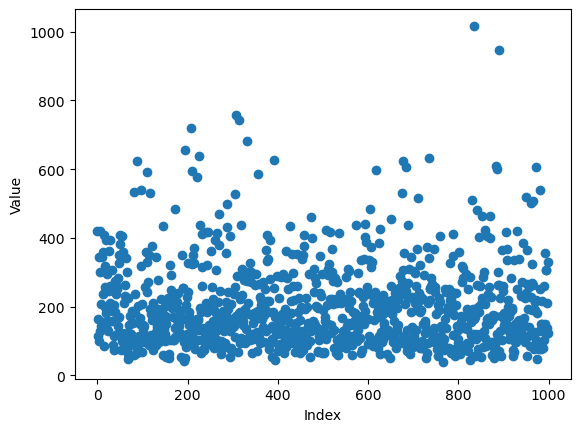

In [6]:
# Run this cell!
plt.plot(random_distribution,'o')
plt.xlabel('Index')
plt.ylabel('Value')

What are some other ways we can analyze and visualize this data?  One visualization is a box plot, which shows where the ***quartiles*** of the data set are, as well as **outliers**.

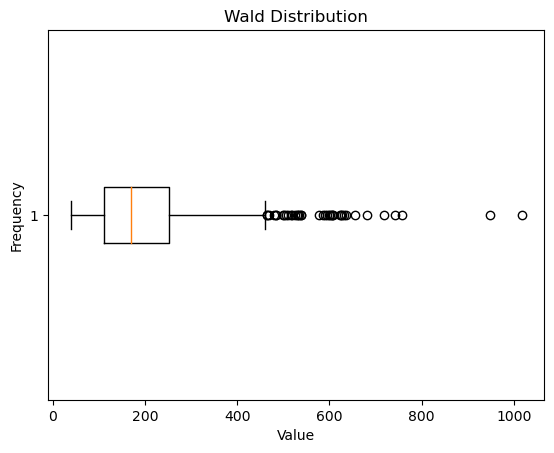

In [7]:
# Run this cell!
box = plt.boxplot(random_distribution, vert=False)
ylabel = plt.ylabel("Frequency")
xlabel = plt.xlabel("Value")
title = plt.title("Wald Distribution")

Another visualization is a **histogram**, which splits the data set into a bunch of equally sized intervals, and then graphs the number of data points that fall into each interval. The higher the bar on a histogram, the more data points in that interval. Thought of another way, a histogram shows you the "count" or "frequency" of values falling into a specific bin on the x-axis.

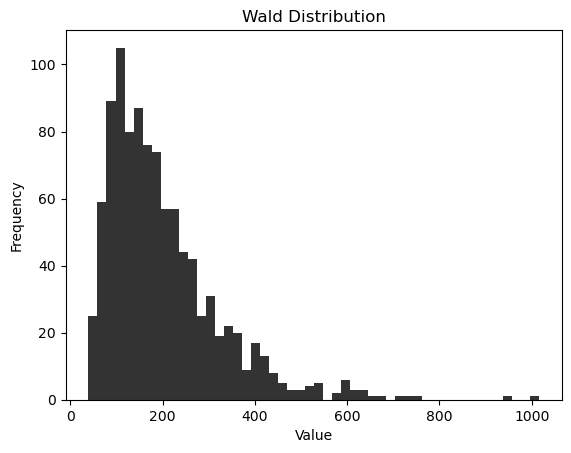

In [8]:
# Run this cell!
hist = plt.hist(random_distribution, bins=50, color="k", alpha=0.8) #what's the alpha argument doing? between 0-1, changes darkness
ylabel = plt.ylabel("Frequency")
xlabel = plt.xlabel("Value")
title = plt.title("Wald Distribution")

&#9989;&nbsp; **Compare the representations above**

What are the similarities between how the boxplot represents the data set versus the histogram? What does the boxplot do a better job of showing? What does the histogram do a better job of showing?

<font size=+3>&#9998;</font> *Both show the spread and variance of the data.  The boxplot does a better job of representing percentiles and outliers but the histogram shows better frequency of specific values.*

### 1.3 Compute and Compare

&#9989;&nbsp; **Now lets actually compute the mean and median and visualize them on the distribution graph.**

Add **two vertical lines** with different colors where the **mean** and **median** are using Matplotlib's [`plt.axvline()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html) function -- this might be new to you, so make sure you understand how it works!

**Make sure you label your lines and include a legend.**

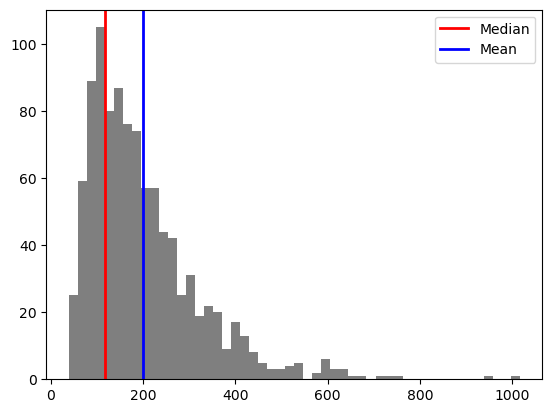

In [9]:
hist = plt.hist(random_distribution,bins=50,color="k",alpha=0.5)
# Add your additional plotting commands here

# The following line is provided to help get you started, you need to decide what to use for the "x" argument
mid = len(random_distribution)/2
plt.axvline(x=random_distribution[500],linewidth=2, color='r',label = "Median")
mean = np.mean(random_distribution)
plt.axvline(x=mean,linewidth=2, color='b',label = "Mean")
plt.legend()


&#9989;&nbsp; **Which is larger for this data set, mean or median? Explain why you think that is.**

<font size=+3>&#9998;</font> *The median.  The data is skewed right, which puts the mean further to the left*

---


# Part 2: Loading in and cleaning economic data

The next part we will focus on transforming and manipulating a dataset using Pandas. As data scientist/computational professional in training, one of the goals we want you to accomplish is to be comfortable searching through online resources to try and solve problems. There are far too many functions and concepts in programming to remember everything so in practice it's essential to utilize package documentation, stack overflow, etc. Some of the questions you will see below will ask you to use or look for a function you've never used before to get you to practice Googling questions that help you accomplish your task.

---

## What data are we working with?

We will be analyzing a dataset from the World Bank containing yearly GDP data for countries from 1960-2020. The GDP numbers have been converted to USD for all countries by the exchange rate at the time. Which is important to note because depending on the exchange rates at the time this could over/under value the non US countries numbers or increase the variance of GDP.

The dataset comes from here: https://data.worldbank.org/indicator/ny.gdp.mktp.cd

GDP stands for **Gross Domestic Product** and it is equal to the market value of all the finished goods and services produced within a country's borders in a specific time period.

GDP = Consumer Spending + Private Investment + Government Expenditure + Net Exports

---

### 2.1 Cleaning data is an important part analyzing data.

First, we're going to load in the `.csv` dataset into a Pandas Dataframe and explore the original structure of the data and think about if it could be formatted in a more useful way. **If you were to download the data from the website, you might end up with more than one .csv file, we've provided the one that contains the GDP information on the course website.**

Make sure you import the Pandas module before moving on!

In [10]:
# put your Pandas import command here
import pandas as pd

&#9989;&nbsp; **Load in the API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4770391.csv file using `pd.read_csv()`.  Skip the first 4 rows and use a comma as the delimiter. Then display the first few lines using `.head()`.**

Use `gdp` as the variable name for storing your dataframe as indicated in the code cell below.

In [11]:
# Load in GDP.csv
gdp = pd.read_csv('countrygdp.csv',skiprows=4,delimiter = ',')
#gdp = # Finish this line to load in the data!
gdp.head

<bound method NDFrame.head of                     Country Name Country Code     Indicator Name  \
0                          Aruba          ABW  GDP (current US$)   
1    Africa Eastern and Southern          AFE  GDP (current US$)   
2                    Afghanistan          AFG  GDP (current US$)   
3     Africa Western and Central          AFW  GDP (current US$)   
4                         Angola          AGO  GDP (current US$)   
..                           ...          ...                ...   
261                       Kosovo          XKX  GDP (current US$)   
262                  Yemen, Rep.          YEM  GDP (current US$)   
263                 South Africa          ZAF  GDP (current US$)   
264                       Zambia          ZMB  GDP (current US$)   
265                     Zimbabwe          ZWE  GDP (current US$)   

     Indicator Code          1960          1961          1962          1963  \
0    NY.GDP.MKTP.CD           NaN           NaN           NaN           Na

As a first step to cleaning a data set, it can be helpful to get rid of rows that have a lot of "NaN" values. NaN means "Not a Number," and it is a value that sometimes takes the place of a blank entry. Countries that did not track GDP as far back as 1960 will have some NaN values, such as Aruba and Angola. You may want to keep these rows in your own data sets, but for this assignment, we are going to "drop" them from the data set, using a handy pandas function called "dropna".

**Important note**: sometimes when you use Pandas function is modifies your dataframe directly, but other times it generates a *new* dataframe based on the old one. When the function **returns** a new dataframe, we need to make sure we store that result in a variable. **Look carefully at the code below to see how this is being done**.

In [12]:
gdp = gdp.dropna(axis="columns", how="all") # drop empty columns, like the last column in gdp
gdp = gdp.dropna() # drop rows with NaNs, like Aruba and Angola:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129081e+10,2.180870e+10,2.370727e+10,2.821034e+10,2.611906e+10,2.968249e+10,...,9.725734e+11,9.834729e+11,1.003768e+12,9.245228e+11,8.827213e+11,1.021119e+12,1.007240e+12,1.001017e+12,9.274845e+11,1.080712e+12
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,...,7.360399e+11,8.322169e+11,8.924979e+11,7.669580e+11,6.905454e+11,6.837480e+11,7.663597e+11,7.947191e+11,7.847997e+11,8.401873e+11
13,Australia,AUS,GDP (current US$),NY.GDP.MKTP.CD,1.860567e+10,1.968194e+10,1.992160e+10,2.153881e+10,2.379998e+10,2.597491e+10,...,1.546892e+12,1.576380e+12,1.467545e+12,1.350616e+12,1.206535e+12,1.326516e+12,1.428289e+12,1.392228e+12,1.326901e+12,1.552667e+12
14,Austria,AUT,GDP (current US$),NY.GDP.MKTP.CD,6.592694e+09,7.311750e+09,7.756110e+09,8.374175e+09,9.169984e+09,9.994071e+09,...,4.094018e+11,4.301910e+11,4.425848e+11,3.819711e+11,3.958374e+11,4.172612e+11,4.549912e+11,4.446212e+11,4.352252e+11,4.803684e+11
16,Burundi,BDI,GDP (current US$),NY.GDP.MKTP.CD,1.960000e+08,2.030000e+08,2.135000e+08,2.327500e+08,2.607500e+08,1.589950e+08,...,2.333341e+09,2.451607e+09,2.705783e+09,3.104004e+09,2.639321e+09,2.712324e+09,2.660124e+09,2.576519e+09,2.649672e+09,2.779813e+09


___
**Note that the `dropna` function was accessed from the dataframe itself (`gdp.dropna()`).**  These functions are included with each dataframe object. We've already seen this with functions like `describe()`, and even with numpy array functions like `my_array.sum()`.  Many of the functions you'll be using today are included with the dataframe objects. 

You can browse through these built-in functions by typing the name of a dataframe followed by `.` and then hitting the tab key.  Try it out below!

In [13]:
# uncomment the line below, then go to the end of the line and hit tab 
gdp. head

<bound method NDFrame.head of                        Country Name Country Code     Indicator Name  \
1       Africa Eastern and Southern          AFE  GDP (current US$)   
3        Africa Western and Central          AFW  GDP (current US$)   
13                        Australia          AUS  GDP (current US$)   
14                          Austria          AUT  GDP (current US$)   
16                          Burundi          BDI  GDP (current US$)   
..                              ...          ...                ...   
253  St. Vincent and the Grenadines          VCT  GDP (current US$)   
259                           World          WLD  GDP (current US$)   
263                    South Africa          ZAF  GDP (current US$)   
264                          Zambia          ZMB  GDP (current US$)   
265                        Zimbabwe          ZWE  GDP (current US$)   

     Indicator Code          1960          1961          1962          1963  \
1    NY.GDP.MKTP.CD  2.129081e+10  2.1

If you want to learn more about something, select it (or type it out), add a question mark (`?`) and then run the cell. **Ask an instructor for help if you can't get the `?` mark trick to work!**
___

### Making the dataset easier to explore

Typically when we are looking at data over time we represent each time step as a row rather than a column. Switching the rows and columns is an operation known as "Transposing" and [Pandas has a function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html) that does that! 

**IMPORTANT:** When you use Pandas functions on dataframes, some operations will affect the original dataframe (referred to as "**in place**" operations), and some will not (referred to as "**not in place**" operations). Transposing a dataframe is a **not in place** operation, meaning that the results are not saved unless you save them to a variable!

Let's transpose the dataset to get years as rows instead of columns.

Example of Transposing:

<img src="https://www.howtogeek.com/wp-content/uploads/2016/06/00_lead_image_transpose_word_table.png" width=500px>

&#9989;&nbsp; **Transpose the data** to flip the orientation of the rows and columns.

In [14]:
# Transpose the dataframe here and check to see if it worked
transgdp = gdp.T
# MAKE SURE YOU SAVE YOUR TRANSPOSED DATAFRAME AS A VARIABLE
transgdp

,1,3,13,14,16,17,18,19,20,23,...,244,247,249,250,251,253,259,263,264,265
Country Name,Africa Eastern and Southern,Africa Western and Central,Australia,Austria,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,"Bahamas, The",...,Turkiye,Uganda,Upper middle income,Uruguay,United States,St. Vincent and the Grenadines,World,South Africa,Zambia,Zimbabwe
Country Code,AFE,AFW,AUS,AUT,BDI,BEL,BEN,BFA,BGD,BHS,...,TUR,UGA,UMC,URY,USA,VCT,WLD,ZAF,ZMB,ZWE
Indicator Name,GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),...,GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$)
Indicator Code,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,...,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD
1960,21290811193.816399,10404135069.15,18605666927.987499,6592693841.18495,195999990.0,11658722590.99,226195579.35701,330442817.168859,4274893913.49536,169803921.568627,...,13983572895.277201,423008385.744235,241947821260.231995,1242289239.20493,543300000000.0,13066557.778685,1392276589084.810059,8748596504.235809,713000000.0,1052990400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1021118730941.079956,683748014299.69397,1326516328531.560059,417261151844.97699,2712324133.79776,502764720556.354004,12701655845.961201,14106956830.085699,293754646182.388977,12357600000.0,...,858996263095.858032,30744473911.5312,21644841419480.898438,64233966861.251801,19477336549000.0,847620222.222222,81400670239258.90625,381448814653.455994,25873601260.8353,17584890937.481998
2018,1007240479573.390015,766359667820.703003,1428288504767.070068,454991174096.10199,2660123597.70762,543299066998.901978,14262408079.701401,15890065019.763399,321379023557.461975,12755800000.0,...,778471900960.980957,32927025573.4296,23304501933943.898438,64515038268.137299,20533057312000.0,884328185.185185,86456888252044.296875,404159690890.846008,26311590296.702099,34156069918.060902
2019,1001017049660.459961,794719102944.19104,1392227864397.080078,444621176100.547974,2576518846.39,535830876745.096985,14391686309.033001,16178162030.069401,351238474244.666992,13192800000.0,...,759937390496.668945,35353060634.202202,23681744716187.800781,61231149880.585701,21380976119000.0,910149703.703704,87645255635476.5,388531954110.604004,23308667781.2258,21832234925.502102
2020,927484450967.307007,784799699387.376953,1326901059123.209961,435225238000.437012,2649671998.86192,525211810652.607971,15651545208.8783,17933606353.177502,373902134700.409973,9699500000.0,...,720289368333.19104,37600368180.939903,22851374975033.800781,53560755046.616203,21060473613000.0,872134555.555555,85105603606117.09375,337619680138.494019,18110631358.311401,21509698406.111599


One of the benefits of Pandas Dataframe is being able to index a column by name rather than a number.

&#9989;&nbsp; **Modify the dataframe so that each country name is used as the column headers by assigning the first row of the dataframe to be the column headers.**

Think back to the Pre-Class Assignment. What information are you looking to retrieve? What tools do you have to access this information? You may want to use `.iloc` to do this. If done correctly, you then should be able to index a column out of our dataframe using `gdp['United States']`, for example. Make sure to test this out!

In [15]:
# Change the column headers to be the country names here.
gdp.index = gdp['Country Name']
gdp.T

Country Name,Africa Eastern and Southern,Africa Western and Central,Australia,Austria,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,"Bahamas, The",...,Turkiye,Uganda,Upper middle income,Uruguay,United States,St. Vincent and the Grenadines,World,South Africa,Zambia,Zimbabwe
Country Name,Africa Eastern and Southern,Africa Western and Central,Australia,Austria,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,"Bahamas, The",...,Turkiye,Uganda,Upper middle income,Uruguay,United States,St. Vincent and the Grenadines,World,South Africa,Zambia,Zimbabwe
Country Code,AFE,AFW,AUS,AUT,BDI,BEL,BEN,BFA,BGD,BHS,...,TUR,UGA,UMC,URY,USA,VCT,WLD,ZAF,ZMB,ZWE
Indicator Name,GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),...,GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$)
Indicator Code,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,...,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD
1960,21290811193.816399,10404135069.15,18605666927.987499,6592693841.18495,195999990.0,11658722590.99,226195579.35701,330442817.168859,4274893913.49536,169803921.568627,...,13983572895.277201,423008385.744235,241947821260.231995,1242289239.20493,543300000000.0,13066557.778685,1392276589084.810059,8748596504.235809,713000000.0,1052990400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1021118730941.079956,683748014299.69397,1326516328531.560059,417261151844.97699,2712324133.79776,502764720556.354004,12701655845.961201,14106956830.085699,293754646182.388977,12357600000.0,...,858996263095.858032,30744473911.5312,21644841419480.898438,64233966861.251801,19477336549000.0,847620222.222222,81400670239258.90625,381448814653.455994,25873601260.8353,17584890937.481998
2018,1007240479573.390015,766359667820.703003,1428288504767.070068,454991174096.10199,2660123597.70762,543299066998.901978,14262408079.701401,15890065019.763399,321379023557.461975,12755800000.0,...,778471900960.980957,32927025573.4296,23304501933943.898438,64515038268.137299,20533057312000.0,884328185.185185,86456888252044.296875,404159690890.846008,26311590296.702099,34156069918.060902
2019,1001017049660.459961,794719102944.19104,1392227864397.080078,444621176100.547974,2576518846.39,535830876745.096985,14391686309.033001,16178162030.069401,351238474244.666992,13192800000.0,...,759937390496.668945,35353060634.202202,23681744716187.800781,61231149880.585701,21380976119000.0,910149703.703704,87645255635476.5,388531954110.604004,23308667781.2258,21832234925.502102
2020,927484450967.307007,784799699387.376953,1326901059123.209961,435225238000.437012,2649671998.86192,525211810652.607971,15651545208.8783,17933606353.177502,373902134700.409973,9699500000.0,...,720289368333.19104,37600368180.939903,22851374975033.800781,53560755046.616203,21060473613000.0,872134555.555555,85105603606117.09375,337619680138.494019,18110631358.311401,21509698406.111599


This is looking pretty good!

Of course, now we have a few redundant rows: "Country Name", "Country Code", "Indicator Name", and "Indicator Code". We don't really need these any more now that we've change the column labels.

&#9989;&nbsp; **Remove these four rows, since they don't contain yearly GDP data.** There's more than one way to do this. The best option is to use the `gdp.drop()` function. Figure out how it works with `gdp.drop?`.

In [16]:
# Try to remove the rows that don't represent years here
gdp =gdp.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1)
gdp = gdp.T
gdp

Country Name,Africa Eastern and Southern,Africa Western and Central,Australia,Austria,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,"Bahamas, The",...,Turkiye,Uganda,Upper middle income,Uruguay,United States,St. Vincent and the Grenadines,World,South Africa,Zambia,Zimbabwe
1960,2.129081e+10,1.040414e+10,1.860567e+10,6.592694e+09,1.960000e+08,1.165872e+10,2.261956e+08,3.304428e+08,4.274894e+09,1.698039e+08,...,1.398357e+10,4.230084e+08,2.419478e+11,1.242289e+09,5.433000e+11,1.306656e+07,1.392277e+12,8.748597e+09,7.130000e+08,1.052990e+09
1961,2.180870e+10,1.112789e+10,1.968194e+10,7.311750e+09,2.030000e+08,1.240015e+10,2.356682e+08,3.502472e+08,4.817580e+09,1.900980e+08,...,7.988889e+09,4.415241e+08,2.183622e+11,1.547389e+09,5.633000e+11,1.399988e+07,1.448625e+12,9.225996e+09,6.962857e+08,1.096647e+09
1962,2.370727e+10,1.194319e+10,1.992160e+10,7.756110e+09,2.135000e+08,1.326402e+10,2.364349e+08,3.795670e+08,5.081413e+09,2.122549e+08,...,8.922222e+09,4.490126e+08,2.239607e+11,1.710004e+09,6.051000e+11,1.452488e+07,1.550548e+12,9.813996e+09,6.931429e+08,1.117602e+09
1963,2.821034e+10,1.267633e+10,2.153881e+10,8.374175e+09,2.327500e+08,1.426002e+10,2.539276e+08,3.940406e+08,5.319458e+09,2.377451e+08,...,1.035556e+10,5.161478e+08,2.349677e+11,1.539681e+09,6.386000e+11,1.370822e+07,1.671614e+12,1.085420e+10,7.187143e+08,1.159512e+09
1964,2.611906e+10,1.383837e+10,2.379998e+10,9.169984e+09,2.607500e+08,1.596011e+10,2.698190e+08,4.103216e+08,5.386055e+09,2.666667e+08,...,1.117778e+10,5.890566e+08,2.696465e+11,1.975702e+09,6.858000e+11,1.475821e+07,1.830292e+12,1.195600e+10,8.394286e+08,1.217138e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1.021119e+12,6.837480e+11,1.326516e+12,4.172612e+11,2.712324e+09,5.027647e+11,1.270166e+10,1.410696e+10,2.937546e+11,1.235760e+10,...,8.589963e+11,3.074447e+10,2.164484e+13,6.423397e+10,1.947734e+13,8.476202e+08,8.140067e+13,3.814488e+11,2.587360e+10,1.758489e+10
2018,1.007240e+12,7.663597e+11,1.428289e+12,4.549912e+11,2.660124e+09,5.432991e+11,1.426241e+10,1.589007e+10,3.213790e+11,1.275580e+10,...,7.784719e+11,3.292703e+10,2.330450e+13,6.451504e+10,2.053306e+13,8.843282e+08,8.645689e+13,4.041597e+11,2.631159e+10,3.415607e+10
2019,1.001017e+12,7.947191e+11,1.392228e+12,4.446212e+11,2.576519e+09,5.358309e+11,1.439169e+10,1.617816e+10,3.512385e+11,1.319280e+10,...,7.599374e+11,3.535306e+10,2.368174e+13,6.123115e+10,2.138098e+13,9.101497e+08,8.764526e+13,3.885320e+11,2.330867e+10,2.183223e+10
2020,9.274845e+11,7.847997e+11,1.326901e+12,4.352252e+11,2.649672e+09,5.252118e+11,1.565155e+10,1.793361e+10,3.739021e+11,9.699500e+09,...,7.202894e+11,3.760037e+10,2.285137e+13,5.356076e+10,2.106047e+13,8.721346e+08,8.510560e+13,3.376197e+11,1.811063e+10,2.150970e+10


Now our dataset should be in an easier format. The next step is to examine the structure of our data.

&#9989;&nbsp; **Review the following code and comment what each line is doing.**

In [17]:

print(gdp.index) #printing a list of all the years

print(type(gdp.index[0])) #classifies the terms of the index as type string

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')
<class 'str'>


We can see the index column is made up of strings representing years, which isn't ideal!

The code below will change the data type from strings to integers. This will be helpful for when we begin plotting because when you try to plot strings as numbers it doesn't usually work out very well!

In [18]:

gdp.index = gdp.index.astype(int)
print(gdp.index)
gdp

Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021],
      dtype='int32')


Country Name,Africa Eastern and Southern,Africa Western and Central,Australia,Austria,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,"Bahamas, The",...,Turkiye,Uganda,Upper middle income,Uruguay,United States,St. Vincent and the Grenadines,World,South Africa,Zambia,Zimbabwe
1960,2.129081e+10,1.040414e+10,1.860567e+10,6.592694e+09,1.960000e+08,1.165872e+10,2.261956e+08,3.304428e+08,4.274894e+09,1.698039e+08,...,1.398357e+10,4.230084e+08,2.419478e+11,1.242289e+09,5.433000e+11,1.306656e+07,1.392277e+12,8.748597e+09,7.130000e+08,1.052990e+09
1961,2.180870e+10,1.112789e+10,1.968194e+10,7.311750e+09,2.030000e+08,1.240015e+10,2.356682e+08,3.502472e+08,4.817580e+09,1.900980e+08,...,7.988889e+09,4.415241e+08,2.183622e+11,1.547389e+09,5.633000e+11,1.399988e+07,1.448625e+12,9.225996e+09,6.962857e+08,1.096647e+09
1962,2.370727e+10,1.194319e+10,1.992160e+10,7.756110e+09,2.135000e+08,1.326402e+10,2.364349e+08,3.795670e+08,5.081413e+09,2.122549e+08,...,8.922222e+09,4.490126e+08,2.239607e+11,1.710004e+09,6.051000e+11,1.452488e+07,1.550548e+12,9.813996e+09,6.931429e+08,1.117602e+09
1963,2.821034e+10,1.267633e+10,2.153881e+10,8.374175e+09,2.327500e+08,1.426002e+10,2.539276e+08,3.940406e+08,5.319458e+09,2.377451e+08,...,1.035556e+10,5.161478e+08,2.349677e+11,1.539681e+09,6.386000e+11,1.370822e+07,1.671614e+12,1.085420e+10,7.187143e+08,1.159512e+09
1964,2.611906e+10,1.383837e+10,2.379998e+10,9.169984e+09,2.607500e+08,1.596011e+10,2.698190e+08,4.103216e+08,5.386055e+09,2.666667e+08,...,1.117778e+10,5.890566e+08,2.696465e+11,1.975702e+09,6.858000e+11,1.475821e+07,1.830292e+12,1.195600e+10,8.394286e+08,1.217138e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1.021119e+12,6.837480e+11,1.326516e+12,4.172612e+11,2.712324e+09,5.027647e+11,1.270166e+10,1.410696e+10,2.937546e+11,1.235760e+10,...,8.589963e+11,3.074447e+10,2.164484e+13,6.423397e+10,1.947734e+13,8.476202e+08,8.140067e+13,3.814488e+11,2.587360e+10,1.758489e+10
2018,1.007240e+12,7.663597e+11,1.428289e+12,4.549912e+11,2.660124e+09,5.432991e+11,1.426241e+10,1.589007e+10,3.213790e+11,1.275580e+10,...,7.784719e+11,3.292703e+10,2.330450e+13,6.451504e+10,2.053306e+13,8.843282e+08,8.645689e+13,4.041597e+11,2.631159e+10,3.415607e+10
2019,1.001017e+12,7.947191e+11,1.392228e+12,4.446212e+11,2.576519e+09,5.358309e+11,1.439169e+10,1.617816e+10,3.512385e+11,1.319280e+10,...,7.599374e+11,3.535306e+10,2.368174e+13,6.123115e+10,2.138098e+13,9.101497e+08,8.764526e+13,3.885320e+11,2.330867e+10,2.183223e+10
2020,9.274845e+11,7.847997e+11,1.326901e+12,4.352252e+11,2.649672e+09,5.252118e+11,1.565155e+10,1.793361e+10,3.739021e+11,9.699500e+09,...,7.202894e+11,3.760037e+10,2.285137e+13,5.356076e+10,2.106047e+13,8.721346e+08,8.510560e+13,3.376197e+11,1.811063e+10,2.150970e+10


### 2.2 Exploring the Data

&#9989;&nbsp; **Now pick 2 countries and print the GDP for year 1975 using `.loc` and the column name.** Again, look back at the dataset and think about what information we are looking to retrieve. What information is stored in our columns? What information is stored in our rows? 

In [19]:
# Put your code here
print('Uraguay:',gdp['Uruguay'].loc[1975],', Benin:',gdp['Benin'].loc[1975])

Uraguay: 3538283322.07726 , Benin: 676870140.341529


&#9989;&nbsp; Now, **plot those two countries GDP *in billions of dollars* from 1960-2020, make sure to have proper labels and legends.**


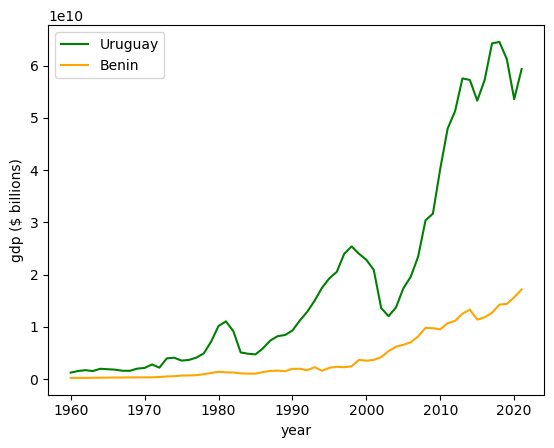

In [20]:
# Put your plotting commands here
years = list(range(1960,2021))
plt.plot(gdp['Uruguay'],color='green',label='Uruguay')
plt.plot(gdp['Benin'],color='orange',label='Benin')
plt.xlabel('year')
plt.ylabel('gdp ($ billions)')
plt.legend()

&#9989;&nbsp; **Question** Is this a good way visual comparison for the two countries? If one country has a much larger GDP or much larger population than the other country what would be a better way to normalize or compare the data? This might involve doing some sort of calculation or visualizing the data differently.

<font size=+3>&#9998;</font> *A good way to graph may be GDP per capita.  However GDP per capita is very susceptible to outliers*

### 2.3 Exploring the log-linear plot

During the COVID-19 pandemic, some of the visualizations floating around that show the numbers of confirmed cases in various places around the world have been "log-linear" plots which uses a logarithmic scale (tick marks indicate powers of 10) on the y-axis and a linear scale on the x-axis. Some folks have even written papers about [how these sort of plots may or may not impact how people perceive the need for confinement](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7200843/) to stop the spread of the virus.

You can change the scaling of an axis for a matplotlib plot using `plt.yscale('log')`. Or, you can try using the `plt.semilogy()` function.

&#9989;&nbsp; Try using a log scale for the GDP in the previous plot for the two different countries to see if it facilitates a better comparison!

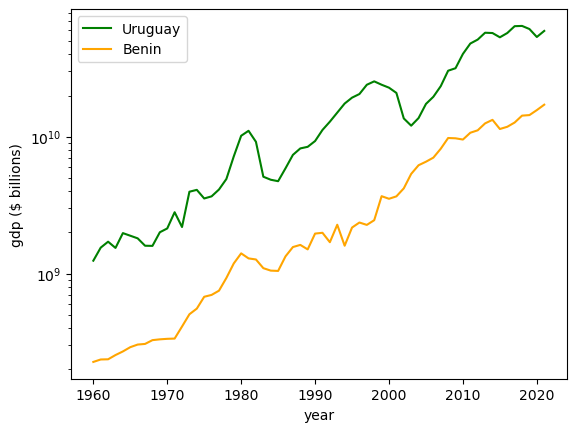

In [21]:
# Try making a "semilogy" plot here or try use the `plt.yscale()` function to modify your plot
#plt.yscale('log')
plt.semilogy()
plt.plot(gdp['Uruguay'],color='green',label='Uruguay')
plt.plot(gdp['Benin'],color='orange',label='Benin')
plt.xlabel('year')
plt.ylabel('gdp ($ billions)')
plt.legend()

&#9989;&nbsp; **Question** Do you find this to be a better way to visualize the data, yes or no? Explain your reasoning!

<font size=+3>&#9998;</font> *The graph looks much more linear.  The log function 'factors in' the regular growth constant e and focuses more on the positive trend.*

### 2.4 Analyzing growth rates

One way to compare GDP between different countries in a way that is unit free would be to consider the countries _growth rates_. The growth rate for a year would be equal to the **percent change** going from one year to another, defined like so:

* Growth Rate in 1961 = (GDP in year 1961 - GDP in year 1960) / GDP in year 1960

&#9989;&nbsp; **Lets plot two countries growth rates on the same plot over time making sure to properly label our graph.**

(**Hint**: Pandas dataframes might have a function that can compute the percent change for you -- time to consult the internet again!)

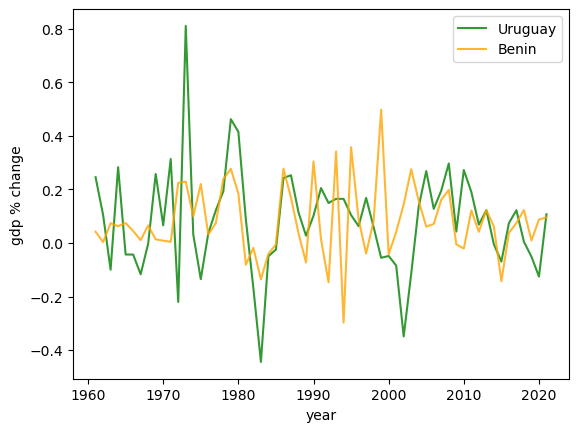

In [22]:
# Calculate and plot the growth rates as a function of time
plt.plot(gdp['Uruguay'].pct_change(),color='green',label='Uruguay',alpha=.8)
plt.plot(gdp['Benin'].pct_change(),color='orange',label='Benin',alpha=.8)
plt.xlabel('year')
plt.ylabel('gdp % change')
plt.legend()


&#9989;&nbsp; **Question**: Why might comparing growth rates be a better comparison for countries that have GDP's of very different magnitudes?


<font size=+3>&#9998;</font> *it can be importantant to see if countries are increasing gdp at faster rates, more consistently, or if their changes are correllated*

---

## More Data Manipulation (time permitting or if you're interested in exploring the data further on your own time!)
### Filtering, sorting, and calculating new quantities 

You've been able to clean, transform, and visualize the data, but for an extra challenge let's use any time you have remaining to work on filtering and sorting your data.

The below analyses are going to focus on data for individual countries for the year 2020. To get started, we're going to:

1. create a new dataset for only the year 2020, and
2. drop columns that don't correspond to individual countries

In [23]:
gdp2020 = gdp.loc[2020]
gdp2020 = gdp2020.drop(['World', 'High income', 'OECD members', 'Post-demographic dividend', 'IDA & IBRD total', 
                        'Low & middle income', 'Middle income', 'IBRD only', 'Upper middle income',
                        'North America', 'Late-demographic dividend',
                        'East Asia & Pacific',
                        'East Asia & Pacific (excluding high income)',
                        'East Asia & Pacific (IDA & IBRD countries)', 'Euro area', 'Early-demographic dividend',
                        'Lower middle income', 'Latin America & Caribbean',
                        'Latin America & the Caribbean (IDA & IBRD countries)',
                        'Latin America & Caribbean (excluding high income)', 'South Asia',
                        'South Asia (IDA & IBRD)', 'IDA total',
                        'Sub-Saharan Africa', 'Sub-Saharan Africa (IDA & IBRD countries)',
                        'Sub-Saharan Africa (excluding high income)', 'IDA only'])

&#9989;&nbsp; **Great!  Now filter the top 10% of countries in the cleaned up data set by their 2020 GDP, print their names, and store the names in a list in ordered by their GDP ranking.**

(**Hint**: Pandas has a `quantile` function that could be useful to find the value for the 10% cut off as well as a function for sorting the values)

In [74]:
# Put your code for finding the countries with the highest 10 GDP values and sorting them here
gdp2020
gdp2020.quantile([.9,1]) 

#gdp2020.quantile(0.5, numeric_only=False)
rankedgdp = gdp2020.rank()
rankedgdp[:95]
for i in range(97):
    for a in range(0,87):
        if float(rankedgdp[i]) == a:
            rankedgdp.drop(float(i+1.0))


KeyError: '[1.0] not found in axis'

&#9989;&nbsp; **Let's take a closer look at how the countries rank by plotting a horizontal bar graph of the top 10% countries GDP in billions by ranking order starting with the highest GDP.**

Pandas dataframes have a horizontal bar graph function as well (`.plot.barh()`) -- isn't Pandas handy?

In [ ]:
# Make your horizonal bar graph here


&#9989;&nbsp; **With Pandas, we can pull multiple columns at the same time. Using that list of the top 10% of countries, create a subset of the original GDP dataframe that has data for only the last 20 years for countries in your list of top 10%.**

We can create a subset by setting a new variable to equal the subset of the Dataframe. 

(something like: `Subset = DataFrame[list_of_columns_headers]`)



In [ ]:
# Put your code here and create additional code cells as needed


&#9989;&nbsp; Next, **calculate the standard deviation of GDP for each country in the subset dataframe over the last 20 years. Recreate the Horizontal Bargraph above with but using the standard deviation.**

&#9989;&nbsp; **Are there similiarities between the GDP graph and the standard deviation graph? Explain why you think they look similiar and what the limitation is with using standard deviation to compare the variation of the GDP for different contries.**

<font size=+3>&#9998;</font> *Put your answer here*

---

**Let's pause and think about the following example:**

In [ ]:
X = np.array([2,4,10,15,30,50])
print(np.std(X))

X2 = X*50
print(np.std(X2))

The idea here is the spread between the numbers in the datasets `X` & `X2` are the same in when considered as a percentage of the total, but the standard deviation will be proportionally higher for `X2`. This means the difference between each observation and the mean from a percentage basis is the same, but because the values in `X2` are 50 times larger, the standard deviation will be 50 times larger.

The take away is if we want to compare how much a countries GDP growth varies relative to another country, we want an apples to apples comparison. For example, taking the standard deviation of the United States compared to Thailand we would expect United States to have a higher standard deviation because the US GDP is much higher. When in reality, Thailand's GDP varies relatively more than the United States GDP varies.


---

In order to compare the variation in GDP by countries of different magnitudes we want to be looking at the change in GDP from a percentage view.

&#9989;&nbsp; **Recreate the horizontal bar graph again, but this time take the standard deviation of the percent changes, or growth rates, of GDP for the last 20 years.**

In [ ]:
# Put your code here


&#9989;&nbsp; **What do you observe? Why is taking the standard deviation of growth rates a better assessment of volatility than standard deviation of normal GDP for this data?**



<font size=+3>&#9998;</font> *Put your answer here*

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [75]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---


## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2023,  The Department of Computational Mathematics, Science and Engineering at Michigan State University.